# Keras Implementation
This notebook uses the (beginner friendly) TensorFlow Sequential API <br/>
Documentation: https://keras.io/guides/

In [1]:
# Install dependencies
!pip install tensorflow

In [2]:
# Import dependencies
from keras import models
from keras import layers
from keras import utils

from keras import datasets # for MNIST dataset


import matplotlib.pyplot as plt # For visualising training stats

In [3]:
# Load data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data() # keras API used to access MNIST dataset, two tuples returned
train_images = train_images.reshape((60000, 784)).astype('float32') / 255 # 60000 images flattened to 1-D 784 pixels long and converted to floats, then normalised between [0-1]
test_images = test_images.reshape((10000, 784)).astype('float32') / 255 # reshape is a numpy function but accessible via tf
train_labels = utils.to_categorical(train_labels) # labels converted to binary vectors e.g. 3 => [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], because categorical crossentropy outputs probabilities across classes
test_labels = utils.to_categorical(test_labels)

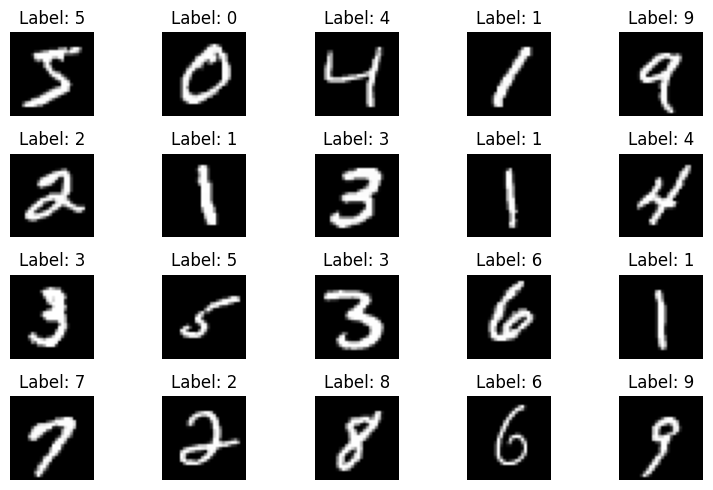

In [4]:
### Optional cell to plot images ###
# Requires numpy
import numpy as np

# Function to plot a grid of images
def plot_images_grid(data, labels, num_rows=4, num_cols=5): # default [4x5] subplots in grid
    plt.figure(figsize=(8,5)) # image width and height
    for i in range(num_rows * num_cols): # loop through total imgs
        plt.subplot(num_rows, num_cols, i+1) # subplot index dependent on loop iteration
        plt.imshow(data[i].reshape(28,28), cmap='gray') # data[i] is index in dataset, reshape used as the images were flattened in pre-processing
        plt.title(f'Label: {np.argmax(labels[i])}') # corresponding title as dataset label
        plt.axis('off') # no borders or axis values for clarity
    plt.tight_layout() # no overlap between images
    plt.show() # render plot
    
plot_images_grid(train_images, train_labels)

In [5]:
# Define the model (sequentially)
model = models.Sequential([ 
    layers.Flatten(input_shape=(784,)), # Converts the input to a 1D array (28x28=784) (not technically required given our pre-processing step, but good to present the process)
    layers.Dense(128, activation='relu'), # Fully connected layer with 128 neurons, each with a Rectified Linear Unit (ReLU) activation function
    layers.Dense(64, activation='relu'), # Fully connected layer with 64 neurons, each with a Rectified Linear Unit (ReLU) activation function
    layers.Dense(10, activation='softmax') # Fully connected layer with 10 neurons (for 10 output classes), each with a Softmax activation function to output a probability betwen [0-1]
])

# A sequential model is suitable for a stack of layers which has 
# exactly one input tensor and one output tensor

# # Alternatively layers can be added incrementally using the Functional API:

# # Define layers
# input_layer = Input(shape=(784,))
# x = Flatten()(input_layer)
# x = Dense(128, activation='relu')(x)
# x = Dense(64, activation='relu')(x)
# output_layer = Dense(10, activation='softmax')(x)
# # Define model
# model = Model(inputs=input_layer, outputs=output_layer)

# OR using the .add() method:

# # Define layers
# model = Sequential()
# model.add(Flatten(input_shape=(784,)))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(10, activation='softmax'))


c:\Users\SensUnit\Documents\GitHub\comparrison-pytorch-tensorflow-keras\.conda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Compile the model
model.compile(optimizer="adam", # Set optimiser
              loss="categorical_crossentropy", # Set loss function
              metrics=["accuracy"]) # List of metrics to track during training

In [7]:
# Train the model
history = model.fit(train_images, train_labels, # history object used to access training stats
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

# .fit() method is used for (not limited to):
#   - Callbacks (functions applied during training e.g. early stopping)
#   - Validation tuples (define specific val data)
#   - Class weighting
#   - Sample weighting
#   - etc.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8641 - loss: 0.4668 - val_accuracy: 0.9569 - val_loss: 0.1525
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9630 - loss: 0.1203 - val_accuracy: 0.9690 - val_loss: 0.1080
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9765 - loss: 0.0761 - val_accuracy: 0.9726 - val_loss: 0.0929
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9837 - loss: 0.0535 - val_accuracy: 0.9716 - val_loss: 0.0984
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9866 - loss: 0.0428 - val_accuracy: 0.9747 - val_loss: 0.0969
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9884 - loss: 0.0343 - val_accuracy: 0.9744 - val_loss: 0.0950
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9933 - loss: 0.0219 - val_accuracy: 0.9749 - val_loss: 0.0981
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9920 - loss: 0.0228 - 

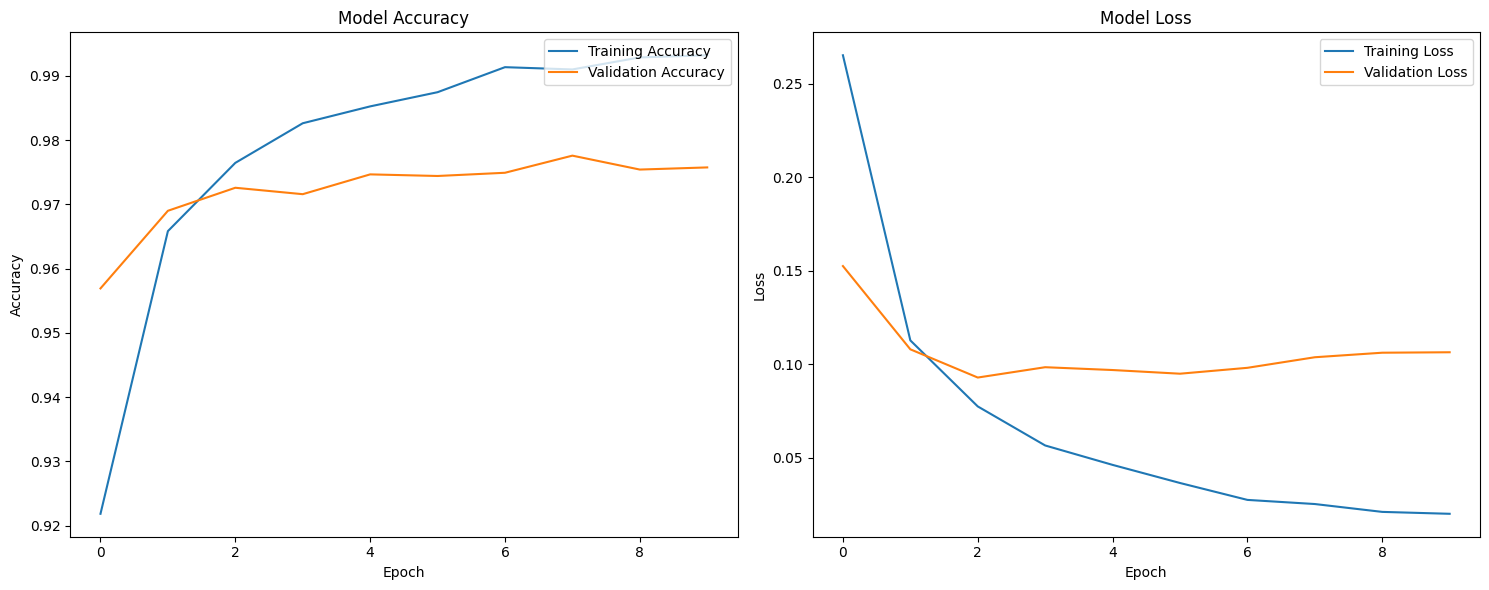

In [8]:
# Visualise model stats
plt.figure(figsize=(15, 6))  # Width, Height in inches

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Display the plots
plt.tight_layout()
plt.show()

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - accuracy: 0.9739 - loss: 0.1013
Test accuracy: 97.680002450943%


In [12]:
# Save the model
model.save("../streamlit_app/assets/trained_models/keras_model.keras")